In [ ]:
# GLO Feb 3 2022

# 1/ function to read Ecospace out time series into pandas
# 2/ function to read CSV of chl_a prepped by Dhavan
# 3/ visual to plot repeated time series line graphs from Ecospace

# in future use xarray - easier than netcdf library
#  e.g. https://github.com/bmooremaley/software-workouts/blob/master/tutorials/pub_quality_figures.ipynb
# https://github.com/SalishSeaCast/analysis-ben
# https://github.com/SalishSeaCast/analysis-ben/blob/master/notebooks/Jun-Aug_anomalies_201905.ipynb

In [1]:
import numpy as np
#import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt, dates
import matplotlib.gridspec as grid_spec
from datetime import datetime, timedelta
from calendar import month_name

#from tqdm.notebook import tqdm
#from salishsea_tools import nc_tools
#from dask.diagnostics import ProgressBar

%matplotlib inline

In [15]:
# Read Ecospace out time series files
#path_ecospaceout = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//LTL_model//ECOSPACE_OUT//LTL_diag_Feb7_Vul1//ECOSPACE_diagnostic_LTL_2022_Jan21//ECOSPACE RUN 105//"
#path_ecospaceout = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//LTL_model//ECOSPACE_OUT//LTL_diag_Feb7_Vul1p3//ECOSPACE_diagnostic_LTL_2022_Jan21//ECOSPACE RUN 105//"
#path_ecospaceout = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//LTL_model//ECOSPACE_OUT//LTL_diag_Feb7_Vul1_TS24//ECOSPACE_diagnostic_LTL_2022_Jan21//ECOSPACE RUN 105//"
path_ecospaceout = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//LTL_model//ECOSPACE_OUT//LTL_diag_Feb7_Vul1p3_TS24//ECOSPACE_diagnostic_LTL_2022_Jan21//ECOSPACE RUN 105//"
#path_ecospaceout = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//LTL_model//ECOSPACE_OUT//LTL_diag_Feb7_Vul1p8_TS24//ECOSPACE_diagnostic_LTL_2022_Jan21//ECOSPACE RUN 105//"
#path_ecospaceout = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//LTL_model//ECOSPACE_OUT//LTL_diag_Feb7_Vul1_TS12_QbmaxQ2//ECOSPACE_diagnostic_LTL_2022_Jan21//ECOSPACE RUN 105//"
#path_ecospaceout = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//LTL_model//ECOSPACE_OUT//LTL_diag_Feb7_Vul1_TS12_QbmaxQ2//ECOSPACE_diagnostic_LTL_2022_Jan21//ECOSPACE RUN 105//"
#path_ecospaceout = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//LTL_model//ECOSPACE_OUT//LTL_diag_Feb7_Vul1P3_TS12_fnP5//ECOSPACE_diagnostic_LTL_2022_Jan21//ECOSPACE RUN 105//"


timestepsyr = 24 # only choose from 12 or 24 right now

file_esout_B = "Ecospace_Average_Biomass.csv"

# header lines in out files are non-standardized so more lines with more driver data
# so may need fiddling
skipheaderlines_annualavg = 28
#skipheaderlines_annualavg = 32
#skipheaderlines_averageBTS = 32
ecospace_df = pd.read_csv(path_ecospaceout + file_esout_B, skiprows=skipheaderlines_annualavg, index_col=0)

init_yr = 1979
init_mo = 1

if timestepsyr == 12:
    # create date field (1 timestep per month)
    ecospace_df["year"] = (ecospace_df.index - 1) // 12 + 1979 # // divides but drops remainder
    ecospace_df["month0"] = ecospace_df.index % 12 # % gets the remainder only
    ecospace_df["month"] = ecospace_df['month0'].apply(lambda x: 12if x == 0 else x)
    ecospace_df["day"] = 15 # assume Ecospace results are middle of month
    ecospace_df["date1"] = pd.to_datetime(ecospace_df[["year", "month", "day"]])
else:
    # create date field (2 timestep per month)
    ecospace_df["year"] = (ecospace_df.index - 1) // 24 + 1979 # // divides but drops remainder
    ecospace_df["month"] = (ecospace_df.index - 1) % 24 // 2 + 1 # % gets the remainder only
    ecospace_df["day1"] = (ecospace_df.index % 12) % 2 # evals to either 1 or 0 (day 1 or day 15 of month)
    ecospace_df["day"] = ecospace_df['day1'].apply(lambda x: 15 if x == 0 else 1) # if there was no remainder, then set day as first of month, else the 15th of month
    ecospace_df["date1"] = pd.to_datetime(ecospace_df[["year", "month", "day"]])

ecospace_df["All Phyto"] = ecospace_df["P1_micro_dinoflag 20-200 um"] + ecospace_df["P2_micro_diat 20-200 um"] + ecospace_df["P3_nano_2-20um"] + ecospace_df["P4_pico_lt_2um"]
ecospace_df["All Phyto No Flag"] = ecospace_df["P2_micro_diat 20-200 um"] + ecospace_df["P3_nano_2-20um"] + ecospace_df["P4_pico_lt_2um"]

ecospace_df.columns

Index(['F1_Icthyomero', 'Z1_2-20cm_macro', 'Z2_0.2-20mm_meso',
       'Z3_20-200um_micro', 'Z4_5-20um_nano', 'P1_micro_dinoflag 20-200 um',
       'P2_micro_diat 20-200 um', 'P3_nano_2-20um', 'P4_pico_lt_2um',
       'Detritus', 'year', 'month', 'day1', 'day', 'date1', 'All Phyto',
       'All Phyto No Flag'],
      dtype='object')

In [4]:
ecospace_df

,F1_Icthyomero,Z1_2-20cm_macro,Z2_0.2-20mm_meso,Z3_20-200um_micro,Z4_5-20um_nano,P1_micro_dinoflag 20-200 um,P2_micro_diat 20-200 um,P3_nano_2-20um,P4_pico_lt_2um,Detritus,year,month,day1,day,date1,All Phyto,All Phyto No Flag
TimeStep,,,,,,,,,,,,,,,,,
1,3.443896,25.76473,17.90270,9.937425,12.43459,4.269355,9.641190,12.351190,9.430221,215.7121,1979,1,1,1,1979-01-01,35.691956,31.422601
2,3.747984,26.39821,17.19407,6.575912,13.53744,3.185663,8.735984,15.314810,17.188790,224.4950,1979,1,0,15,1979-01-15,44.425247,41.239584
3,3.815040,26.75901,16.15434,5.287306,17.64979,2.701227,8.507850,11.508510,15.835740,232.2255,1979,2,1,1,1979-02-01,38.553327,35.852100
4,3.719547,26.89281,15.33225,4.363636,18.88787,2.743177,8.245722,13.928400,19.694700,234.3471,1979,2,0,15,1979-02-15,44.611999,41.868822
5,3.480903,26.80021,14.81947,3.940715,21.88077,3.250664,8.238042,16.038650,21.787910,240.8387,1979,3,1,1,1979-03-01,49.315266,46.064602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,3.483031,35.70296,24.62014,2.762528,34.61761,3.496231,8.262061,13.982830,13.387670,347.5781,2018,10,0,15,2018-10-15,39.128792,35.632561
957,3.443005,36.91922,23.33518,2.559309,29.64509,2.587335,7.905623,11.170450,11.154410,335.3548,2018,11,1,1,2018-11-01,32.817818,30.230483
958,3.338693,37.74972,21.81606,2.171677,23.92918,1.989211,7.987806,10.154040,11.134480,309.4404,2018,11,0,15,2018-11-15,31.265537,29.276326


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The ewe results (mean B)
   year mean_B_group     mean_B meanB_source
0  1979    All Phyto  43.223012     Ecospace
1  1980    All Phyto  43.343024     Ecospace
2  1981    All Phyto  46.055246     Ecospace
3  1982    All Phyto  49.149858     Ecospace
4  1983    All Phyto  45.507137     Ecospace


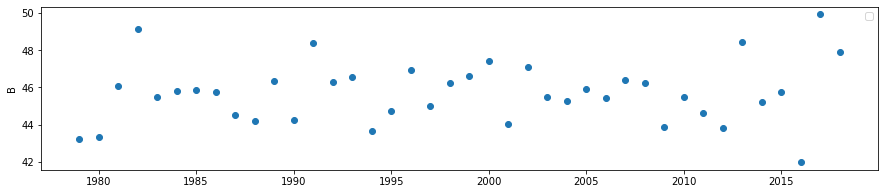

In [16]:
# quick look at mean B

EwE_yrs_mos_mean = []
ewe_group = "All Phyto"
#ewe_group = "All Phyto No Flag"
#ewe_group = "Z1_2-20cm_macro"
#ewe_group = "P1_micro_dinoflag 20-200 um"
#ewe_group = "P2_micro_diat 20-200 um"

for year in range(1979,2018 + 1):
    
    #ecospace_yr_df = ecospace_df[(ecospace_df["year"] == year)]
    # optional dump the months >6
    ecospace_yr_df = ecospace_df[(ecospace_df["year"] == year)]
    mean_B = ecospace_yr_df[ewe_group].mean()
    
    # using list to avoid indexing problem, bad practice to append to df
    data1 = [["year","mean_B_group","mean_B"], [year,ewe_group,mean_B]]
    EwE_yrs_mos_mean.append(data1)

# rebuild a dataframe w/ time series of maximum phyto month and value for B by year
column_names = data1[0]
data2 = []
for i, array1 in enumerate(EwE_yrs_mos_mean):
    data2.append(array1[1])
EwE_yrs_mos_mean = pd.DataFrame(data2, columns=column_names) # convert list back to df

EwE_yrs_mos_mean["meanB_source"] = "Ecospace"
print("The ewe results (mean B)")
print(EwE_yrs_mos_mean.head())

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))
plt.scatter(x=EwE_yrs_mos_mean['year'], y=EwE_yrs_mos_mean['mean_B'])
ax.set_ylabel('B')
ax.legend()

In [6]:
cmap(0.1)

NameError: name 'cmap' is not defined

repeated time series visual example - single groups

    year mean_B_group     mean_B meanB_source
31  2010    All Phyto  45.509132     Ecospace
32  2011    All Phyto  44.611355     Ecospace
33  2012    All Phyto  43.792447     Ecospace
34  2013    All Phyto  48.453480     Ecospace


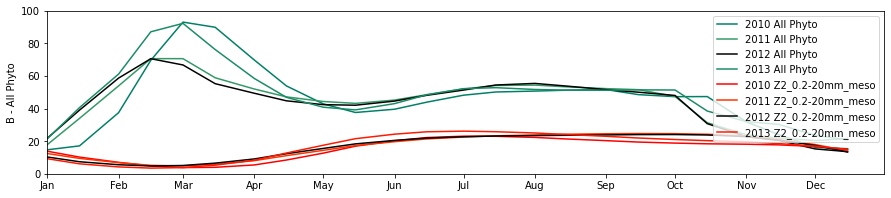

In [17]:
year_start = 2010
year_end = 2014
#ewe_group = "P1_micro_dinoflag 20-200 um"
#ewe_group = "P2_micro_diat 20-200 um"
ewe_group = "All Phyto"

#ewe_group = "All Phyto No Flag"

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))

# Plotting properties
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
#cmap = plt.get_cmap('tab10')
#cmap = plt.get_cmap('tab20b')
cmap = plt.get_cmap('summer')
palette1 = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
#cmap = plt.get_cmap('tab20c')
cmap = plt.get_cmap('autumn')
palette2 = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

# Plot Ecospace out
for year, color in zip(range(year_start, year_end), palette1):
    index = np.logical_and(ecospace_df["date1"] >= datetime(year, 1, 1), ecospace_df["date1"] < datetime(year, 12, 31))
    x = [datetime(2007, t.month, t.day) for t in ecospace_df['date1'][index]]
    ax.plot(x, ecospace_df[ewe_group][index], color=color, label=str(year) + " " + ewe_group)
    
#ewe_group = "Z1_2-20cm_macro"
ewe_group = "Z2_0.2-20mm_meso"
#ewe_group = "Z3_20-200um_micro"
#ewe_group = "P1_micro_dinoflag 20-200 um"

# Plot Ecospace out
for year, color in zip(range(year_start, year_end), palette2):
    index = np.logical_and(ecospace_df["date1"] >= datetime(year, 1, 1), ecospace_df["date1"] < datetime(year, 12, 31))
    x = [datetime(2007, t.month, t.day) for t in ecospace_df['date1'][index]]
    ax.plot(x, ecospace_df[ewe_group][index], color=color, label=str(year)+ " " + ewe_group)

ax.set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)])
ax.set_ylim([0, 100])
ax.set_ylabel('B - All Phyto')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.legend(loc="upper right")

print(EwE_yrs_mos_mean[(EwE_yrs_mos_mean["year"] >= year_start) & (EwE_yrs_mos_mean["year"] < year_end)])

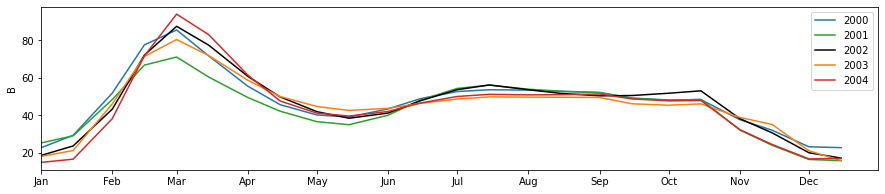

In [18]:
year_start = 2000
year_end = 2005
#ewe_group = "P1_micro_dinoflag 20-200 um"
#ewe_group = "P2_micro_diat 20-200 um"
ewe_group = "All Phyto"

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))

# Plotting properties
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

# Plot Ecospace out
for year, color in zip(range(year_start, year_end), palette):
    index = np.logical_and(ecospace_df["date1"] >= datetime(year, 1, 1), ecospace_df["date1"] < datetime(year, 12, 31))
    x = [datetime(2007, t.month, t.day) for t in ecospace_df['date1'][index]]
    ax.plot(x, ecospace_df[ewe_group][index], color=color, label=year)
ax.set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)])
#ax.set_ylim([0, 12])
ax.set_ylabel('B')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.legend()

In [9]:
ecospace_df

,F1_Icthyomero,Z1_2-20cm_macro,Z2_0.2-20mm_meso,Z3_20-200um_micro,Z4_5-20um_nano,P1_micro_dinoflag 20-200 um,P2_micro_diat 20-200 um,P3_nano_2-20um,P4_pico_lt_2um,Detritus,year,month,day1,day,date1,All Phyto,All Phyto No Flag
TimeStep,,,,,,,,,,,,,,,,,
1,3.443896,25.76473,17.90270,9.937425,12.43459,4.269355,9.641190,12.351190,9.430221,215.7121,1979,1,1,1,1979-01-01,35.691956,31.422601
2,3.747984,26.39821,17.19407,6.575912,13.53744,3.185663,8.735984,15.314810,17.188790,224.4950,1979,1,0,15,1979-01-15,44.425247,41.239584
3,3.815040,26.75901,16.15434,5.287306,17.64979,2.701227,8.507850,11.508510,15.835740,232.2255,1979,2,1,1,1979-02-01,38.553327,35.852100
4,3.719547,26.89281,15.33225,4.363636,18.88787,2.743177,8.245722,13.928400,19.694700,234.3471,1979,2,0,15,1979-02-15,44.611999,41.868822
5,3.480903,26.80021,14.81947,3.940715,21.88077,3.250664,8.238042,16.038650,21.787910,240.8387,1979,3,1,1,1979-03-01,49.315266,46.064602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,3.483031,35.70296,24.62014,2.762528,34.61761,3.496231,8.262061,13.982830,13.387670,347.5781,2018,10,0,15,2018-10-15,39.128792,35.632561
957,3.443005,36.91922,23.33518,2.559309,29.64509,2.587335,7.905623,11.170450,11.154410,335.3548,2018,11,1,1,2018-11-01,32.817818,30.230483
958,3.338693,37.74972,21.81606,2.171677,23.92918,1.989211,7.987806,10.154040,11.134480,309.4404,2018,11,0,15,2018-11-15,31.265537,29.276326


repeated time series visual example - all groups combined

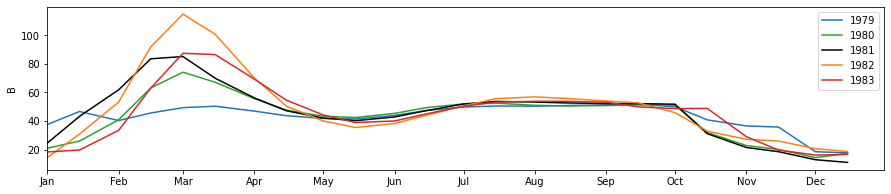

In [19]:

year_start = 1979
year_end = 1984
#ewe_group = "P1_micro_dinoflag 20-200 um"
ewe_group = "All Phyto"

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))

# Plotting properties
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

# Plot Ecospace out
for year, color in zip(range(year_start, year_end), palette):
    index = np.logical_and(ecospace_df["date1"] >= datetime(year, 1, 1), ecospace_df["date1"] < datetime(year, 12, 31))
    x = [datetime(2007, t.month, t.day) for t in ecospace_df['date1'][index]]
    ax.plot(x, ecospace_df[ewe_group][index], color=color, label=year)
ax.set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)])
#ax.set_ylim([0, 12])
ax.set_ylabel('B')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.legend()

## Extract the date of the maximum annual PP and diatoms for time series

In [20]:
import datetime as dt

Allen1DTiming_f = "Fig3_Digitized.csv"
Allen1DTiming_p = "C://Users//Greig//Sync//6. SSMSP Model//Model Greig//Data//28. Phytoplankton//Bloom Timing Allen 2013//"

Allen1D_df = pd.read_csv(Allen1DTiming_p + Allen1DTiming_f)
Allen1D_df["year"] = Allen1D_df["Year"]
Allen1D_df["day_Allen1D"] = Allen1D_df["Day"]
Allen1D_df["model"] = "Allen 1D 2013"

# remove pre-1979
Allen1D_df = Allen1D_df[Allen1D_df["year"] >= 1979]

print("the Allen 1D 2013 model results")
print(Allen1D_df.head())

#yrs_mos_max_PP_df = pd.Dataframe(empty_,columns=["year"])
yrs_mos_max_PP = []
ewe_group = "All Phyto"
#ewe_group = "P1_micro_dinoflag 20-200 um"

for year in range(1979,2009):
    
    #ecospace_yr_df = ecospace_df[(ecospace_df["year"] == year)]
    # optional dump the months >6
    ecospace_yr_df = ecospace_df[(ecospace_df["year"] == year) & (ecospace_df["month"] < 7)]
    
    max_row_df = ecospace_yr_df.loc[ecospace_yr_df[ewe_group] == ecospace_yr_df[ewe_group].max()]
    
    # convert to list to avoid indexing problem, bad practice to append to df
    max_row = max_row_df[["year","month","day","date1",ewe_group]].values.tolist()
    data1 = [["year", "month", "day","date1","vals"], max_row[0]]

    yrs_mos_max_PP.append(data1)

# rebuild a dataframe w/ time series of maximum phyto month and value for B by year
column_names = data1[0]
data2 = []
for i, array1 in enumerate(yrs_mos_max_PP):
    data2.append(array1[1])
yrs_mos_maxPP_df = pd.DataFrame(data2, columns=column_names) # convert list back to df

yrs_mos_maxPP_df["EwE_dayofyear"] = yrs_mos_maxPP_df['date1'].dt.dayofyear
yrs_mos_maxPP_df["model"] = "Ecospace"
print("The ewe results (peak bloom / phyto b)")
print(yrs_mos_maxPP_df.head())

EwE_Allen1D_df = pd.merge(yrs_mos_maxPP_df, Allen1D_df, how="outer", on=["year"])

the Allen 1D 2013 model results
    Year  Day        Date  year  day_Allen1D          model
11  1979   81  1979-03-22  1979           81  Allen 1D 2013
12  1980   94  1980-04-03  1980           94  Allen 1D 2013
13  1981   78  1981-03-19  1981           78  Allen 1D 2013
14  1982   81  1982-03-22  1982           81  Allen 1D 2013
15  1983   82  1983-03-23  1983           82  Allen 1D 2013
The ewe results (peak bloom / phyto b)
   year  month  day      date1        vals  EwE_dayofyear     model
0  1979      3   15 1979-03-15   50.290005             74  Ecospace
1  1980      3    1 1980-03-01   74.105782             61  Ecospace
2  1981      3    1 1981-03-01   85.042758             60  Ecospace
3  1982      3    1 1982-03-01  114.712922             60  Ecospace
4  1983      3    1 1983-03-01   87.326928             60  Ecospace


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


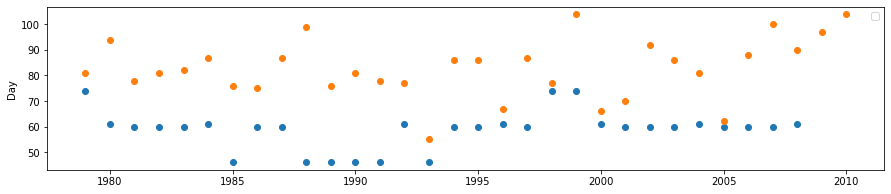

In [21]:
#models = ("Ecospace","Allen 1D 2013")

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))

plt.scatter(x=EwE_Allen1D_df['year'], y=EwE_Allen1D_df['EwE_dayofyear'])
plt.scatter(x=EwE_Allen1D_df['year'], y=EwE_Allen1D_df['day_Allen1D'])

ax.set_ylabel('Day')
#ax.xaxis.set_major_locator(dates.MonthLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.legend()

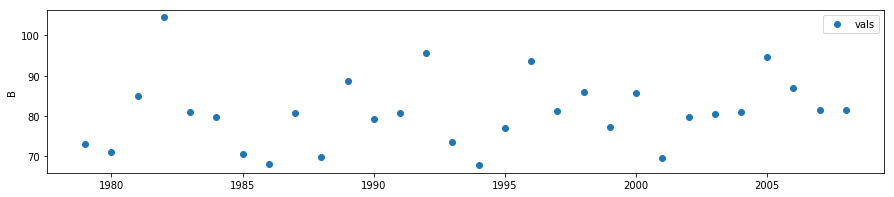

In [11]:
# visual of maximum Phyto B

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))

plt.scatter(x=EwE_Allen1D_df['year'], y=EwE_Allen1D_df['vals'])

ax.set_ylabel('B')
#ax.xaxis.set_major_locator(dates.MonthLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.legend()

In [12]:
EwE_Allen1D_df

,year,month,day,date1,vals,EwE_dayofyear,model_x,Year,Day,Date,day_Allen1D,model_y
0,1979,3.0,1.0,1979-03-01,73.199115,60.0,Ecospace,1979,81,1979-03-22,81,Allen 1D 2013
1,1980,3.0,1.0,1980-03-01,71.147163,61.0,Ecospace,1980,94,1980-04-03,94,Allen 1D 2013
2,1981,3.0,1.0,1981-03-01,85.058878,60.0,Ecospace,1981,78,1981-03-19,78,Allen 1D 2013
3,1982,3.0,1.0,1982-03-01,104.426730,60.0,Ecospace,1982,81,1982-03-22,81,Allen 1D 2013
4,1983,3.0,1.0,1983-03-01,80.949563,60.0,Ecospace,1983,82,1983-03-23,82,Allen 1D 2013
5,1984,3.0,1.0,1984-03-01,79.640704,61.0,Ecospace,1984,87,1984-03-27,87,Allen 1D 2013
6,1985,2.0,1.0,1985-02-01,70.667746,32.0,Ecospace,1985,76,1985-03-17,76,Allen 1D 2013
7,1986,2.0,15.0,1986-02-15,68.223827,46.0,Ecospace,1986,75,1986-03-16,75,Allen 1D 2013
8,1987,3.0,1.0,1987-03-01,80.769785,60.0,Ecospace,1987,87,1987-03-28,87,Allen 1D 2013
9,1988,2.0,15.0,1988-02-15,69.952420,46.0,Ecospace,1988,99,1988-04-08,99,Allen 1D 2013


# calculate the MEAN monthly B from Ecospace

The ewe results (mean B)
   year     mean_B_group     mean_B meanB_source
0  1979  Z1_2-20cm_macro  19.947412     Ecospace
1  1980  Z1_2-20cm_macro  21.295002     Ecospace
2  1981  Z1_2-20cm_macro  20.760021     Ecospace
3  1982  Z1_2-20cm_macro  19.928215     Ecospace
4  1983  Z1_2-20cm_macro  20.298720     Ecospace


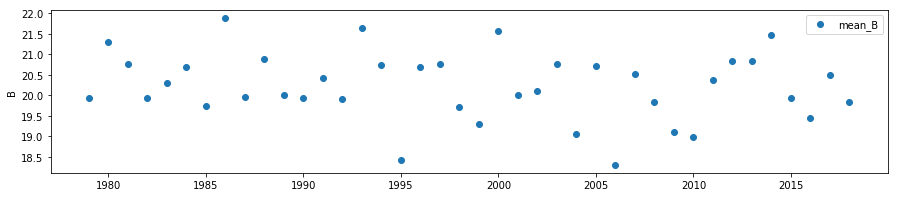

In [15]:
EwE_yrs_mos_mean = []
#ewe_group = "All Phyto"
ewe_group = "Z1_2-20cm_macro"
#ewe_group = "P1_micro_dinoflag 20-200 um"
#ewe_group = "P2_micro_diat 20-200 um"

for year in range(1979,2018 + 1):
    
    #ecospace_yr_df = ecospace_df[(ecospace_df["year"] == year)]
    # optional dump the months >6
    ecospace_yr_df = ecospace_df[(ecospace_df["year"] == year)]
    mean_B = ecospace_yr_df[ewe_group].mean()
    
    # using list to avoid indexing problem, bad practice to append to df
    data1 = [["year","mean_B_group","mean_B"], [year,ewe_group,mean_B]]
    EwE_yrs_mos_mean.append(data1)

# rebuild a dataframe w/ time series of maximum phyto month and value for B by year
column_names = data1[0]
data2 = []
for i, array1 in enumerate(EwE_yrs_mos_mean):
    data2.append(array1[1])
EwE_yrs_mos_mean = pd.DataFrame(data2, columns=column_names) # convert list back to df

EwE_yrs_mos_mean["meanB_source"] = "Ecospace"
print("The ewe results (mean B)")
print(EwE_yrs_mos_mean.head())

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))
plt.scatter(x=EwE_yrs_mos_mean['year'], y=EwE_yrs_mos_mean['mean_B'])
ax.set_ylabel('B')
ax.legend()

In [444]:
mean_row_df

21.732543975

In [75]:
EwE_PerryZ_df

,year,mean_B_group,mean_B,Z1_Macro_Euphausiids,Z3_Meso_CopeLg,Z3_Amphipods_B
0,1979,Z1_2-20cm_macro,19.947412,NaN,NaN,NaN
1,1980,Z1_2-20cm_macro,21.295002,NaN,NaN,NaN
2,1981,Z1_2-20cm_macro,20.760021,NaN,NaN,NaN
3,1982,Z1_2-20cm_macro,19.928215,NaN,NaN,NaN
4,1983,Z1_2-20cm_macro,20.298720,NaN,NaN,NaN
5,1984,Z1_2-20cm_macro,20.699540,NaN,NaN,NaN
6,1985,Z1_2-20cm_macro,19.743197,NaN,NaN,NaN
7,1986,Z1_2-20cm_macro,21.889623,NaN,NaN,NaN
8,1987,Z1_2-20cm_macro,19.965973,NaN,NaN,NaN
9,1988,Z1_2-20cm_macro,20.880444,NaN,NaN,NaN


Index(['Title', 'HerringYoY_B_Boldt2018', 'Z3_Amphipods_B', 'Z5_CalCops_B',
       'Z1_Macro_Euphausiids', 'Z2_Meso_CopeLg', 'Z1_ichthyomero',
       'G3_Ctenophora', 'G2_Medusae', 'G1_Scyphozoa'],
      dtype='object')


C:\Users\Greig\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


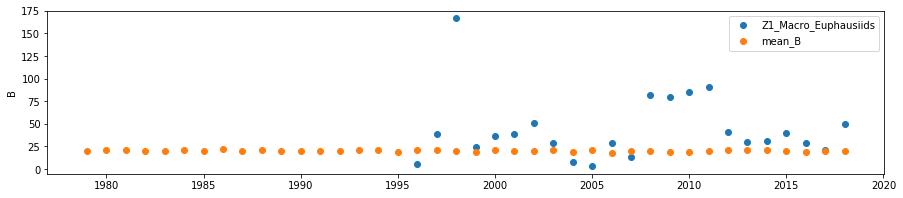

In [16]:
# take a look at Zoop anomaly time series from Perry et al 2021
# it's not log(B), it's B so might try log scale
path = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//LTL_model//DATA//LTL_Time_Series//"
file = "LTL_TimeSeries_trim_2022-1-26.csv"

PerryGroup = "Z1_Macro_Euphausiids"
ewe_group = "mean_B_group"

Perry2021ZTS_df = pd.read_csv(path + file)
print(Perry2021ZTS_df.columns)
Perry2021ZTS_df["year"] = Perry2021ZTS_df["Title"]

df1 = Perry2021ZTS_df.drop([0, 2]).reset_index() # I don't know why drop isn't working better
df2 = df1.drop([0, 0]).reset_index()
df3 = df2.loc[:,["year","Z1_Macro_Euphausiids","Z3_Meso_CopeLg","Z3_Amphipods_B"]]
df3 = df3.fillna(0)
Perry2021ZTS_df = pd.DataFrame(df3)

Perry2021ZTS_df['year'] = Perry2021ZTS_df['year'].values.astype(int)
Perry2021ZTS_df["Z1_Macro_Euphausiids"] = Perry2021ZTS_df["Z1_Macro_Euphausiids"].values.astype(float)
Perry2021ZTS_df["Z3_Meso_CopeLg"] = Perry2021ZTS_df["Z3_Meso_CopeLg"].values.astype(float)
Perry2021ZTS_df["Z3_Amphipods_B"] = Perry2021ZTS_df["Z3_Amphipods_B"].values.astype(float)

# visual of maximum Phyto B

# get one group from Zoop data
#ewe_group1 = "Z3_Amphipods_B"
ewe_group1 = "Z1_Macro_Euphausiids"
selected_Z = Perry2021ZTS_df[Perry2021ZTS_df[ewe_group1]>0]

# merge the data together (easier to plot twice on same chart quickly)
#EwE_Allen1D_PerryZ_df = pd.merge(EwE_Allen1D_df, selected_Z, how="outer", on=["year"])
EwE_PerryZ_df = pd.merge(EwE_yrs_mos_mean, selected_Z, how="outer", on=["year"])

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))

plt.scatter(x=EwE_PerryZ_df['year'], y=EwE_PerryZ_df[PerryGroup])    
plt.scatter(x=EwE_PerryZ_df['year'], y=EwE_PerryZ_df["mean_B"]) 
#plt.scatter(x=EwE_Allen1D_df['year'], y=EwE_Allen1D_df['EwE_dayofyear'])         # Oldford bloom day
#plt.scatter(x=EwE_Allen1D_df['year'], y=EwE_Allen1D_df['day_Allen1D'])            # Allen bloom day

ax.set_ylabel('B')
#ax.xaxis.set_major_locator(dates.MonthLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.legend()

### 

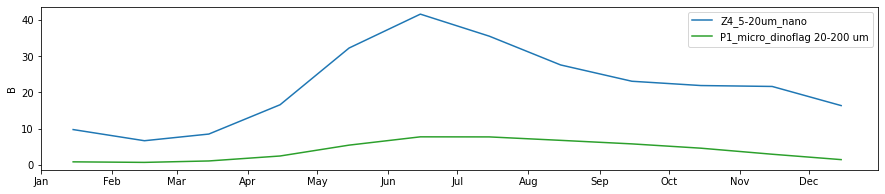

In [17]:
# averages for diatoms and dino (cols 4:6)
#ecospace_df[ewe_group].mean()
monthly_df = ecospace_df.groupby('month').mean()
pivmo_df = monthly_df.iloc[:,4:6].unstack().reset_index()

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))

# Plotting properties
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3), cmap(0.4), cmap(0.6), cmap(0.8)]

# Plot Ecospace out
for ewe_group, color in zip(pivmo_df["level_0"].unique(), palette):
    rows1 = np.equal(pivmo_df["level_0"], ewe_group)
    #x = [m for m in pivmo_df['month'][rows1]]
    x = [datetime(2007, m, 15) for m in pivmo_df['month'][rows1]] # trick to get it to work
    #x = pivmo_df["month"][rows1]
    y = pivmo_df[0][rows1]
    ax.plot(x, y, color=color, label=ewe_group)
ax.set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)]) # match year above
#ax.set_ylim([0, 12])
ax.set_ylabel('B')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.legend()


look at early eighties versus 1990s

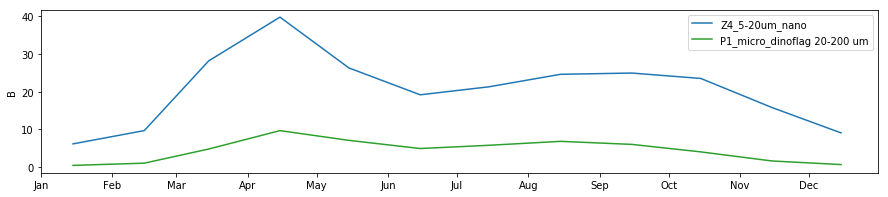

In [18]:
# regime 1(1979-1984) averages for diatoms and dino (cols 4:6)
#ecospace_df[ewe_group].mean()
ecospace_df_regime1 = ecospace_df[ecospace_df["year"] <= 1984]
monthly_df_regime1 = ecospace_df_regime1.groupby('month').mean()
pivmo_df = monthly_df_regime1.iloc[:,4:6].unstack().reset_index()

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))

# Plotting properties
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3), cmap(0.4), cmap(0.6), cmap(0.8)]

# Plot Ecospace out
for ewe_group, color in zip(pivmo_df["level_0"].unique(), palette):
    rows1 = np.equal(pivmo_df["level_0"], ewe_group)
    #x = [m for m in pivmo_df['month'][rows1]]
    x = [datetime(2007, m, 15) for m in pivmo_df['month'][rows1]] # trick to get it to work
    #x = pivmo_df["month"][rows1]
    y = pivmo_df[0][rows1]
    ax.plot(x, y, color=color, label=ewe_group)
ax.set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)]) # match year above
#ax.set_ylim([0, 12])
ax.set_ylabel('B')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.legend()

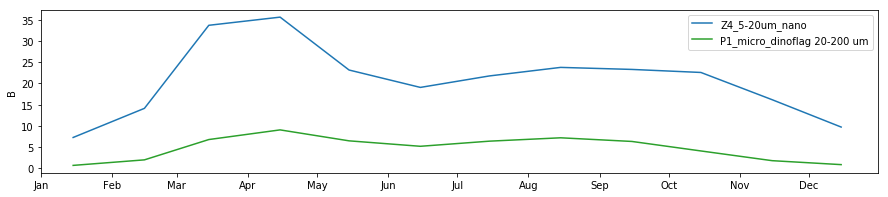

In [93]:
# regime 2(1990-1994) averages for diatoms and dino (cols 4:6)
#ecospace_df[ewe_group].mean()
ecospace_df_regime2 = ecospace_df[(ecospace_df["year"] >= 1990) & (ecospace_df["year"] <= 1994)]
monthly_df_regime2 = ecospace_df_regime2.groupby('month').mean()
pivmo_df = monthly_df_regime2.iloc[:,4:6].unstack().reset_index()

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))

# Plotting properties
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3), cmap(0.4), cmap(0.6), cmap(0.8)]

# Plot Ecospace out
for ewe_group, color in zip(pivmo_df["level_0"].unique(), palette):
    rows1 = np.equal(pivmo_df["level_0"], ewe_group)
    x = [datetime(2007, m, 15) for m in pivmo_df['month'][rows1]] # trick to get it to work
    y = pivmo_df[0][rows1]
    ax.plot(x, y, color=color, label=ewe_group)
ax.set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)]) # match year above
#ax.set_ylim([0, 12])
ax.set_ylabel('B')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.legend()

In [94]:
monthly_df_regime2.iloc[:,12:]

,day,All Phyto
month,,
1,8.0,35.747239
2,8.0,70.781870
3,8.0,68.703426
4,8.0,48.322614
5,8.0,41.839586
6,8.0,47.777518
7,8.0,52.721413
8,8.0,50.951531
9,8.0,49.066459


C:\Users\Greig\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


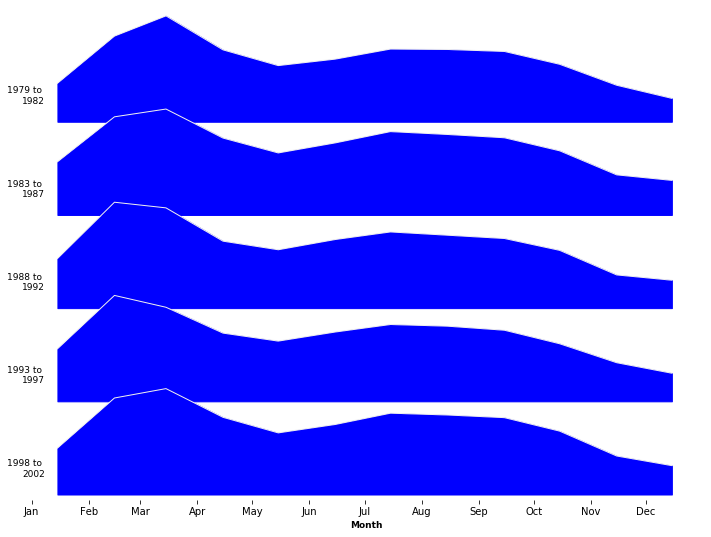

In [95]:
# ridgeline plots looking at change over time (each group)
#https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/

regime_bounds = [[1979,1982],[1983,1987],[1988,1992],[1993,1997],[1998,2002]]
#regime_bounds = [[1979,1981],[1982,1983],[1984,1985],
#                 [1986,1987],[1988,1989],[1990,1991],[1992,1993],
#                 [1994,1995],[1996,1997],[1998,1999],[2000,2001]]

# rows, cols
gs = (grid_spec.GridSpec(len(regime_bounds),1))

fig = plt.figure(figsize=(12,9))

i = 0

#creating empty list
ax_objs = []

#for each group we need different set of panels
#for eco_group in unique_groups:
#ewe_group = 'P1_micro_dinoflag 20-200 um'
#ewe_group = 'P2_micro_diat 20-200 um'
ewe_group = 'All Phyto'
colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000']
i = 0
for regime in regime_bounds:
    
    year_start = regime[0]
    year_end = regime[1]
    
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))
    
    # calc monthly mean values, all groups
    ecospace_df_regime2 = ecospace_df[(ecospace_df["year"] >= year_start) & (ecospace_df["year"] <= year_end)]
    monthly_df_regime2 = ecospace_df_regime2.groupby('month').mean()
    # pivot so long not wide
    #pivmo_df = monthly_df_regime2.iloc[:,4:6].unstack().reset_index()
    pivmo_df = monthly_df_regime2.iloc[:,12:].unstack().reset_index() # numbers are col indices of phyto
    pivmo_df["eco_group"] = pivmo_df["level_0"]
    pivmo_df["vals"] = pivmo_df[0]
    
    # get only data for this eco group
    rows1 = np.equal(pivmo_df["eco_group"], ewe_group)
    
    # trick plots - year arbitrary
    x = [datetime(2007, m, 15) for m in pivmo_df['month'][rows1]] 
    y = pivmo_df[0][rows1]
    
    ax_objs[-1].plot(x,y,color="#f0f0f0",lw=1)
    ax_objs[-1].fill_between(x, y, alpha=1,color='#0000ff')
    #ax_objs[-1].fill_between(x, y, alpha=1,color=colors[i]) # to do fix colors
    
    ax_objs[-1].set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)]) # match year above
    ax_objs[-1].xaxis.set_major_locator(dates.MonthLocator())
    ax_objs[-1].xaxis.set_major_formatter(dates.DateFormatter('%b'))
    
    name_regime = str(year_start) + " to \n" + str(year_end)
   
    ax.set_ylim([0, 12])
    
    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)
    
    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])
    ax_objs[-1].set_yticks([])
    
    if i == len(regime_bounds)-1:
        ax_objs[-1].set_xlabel("Month", fontsize=9,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])
        ax_objs[-1].set_xticks([])
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    # replaces set_ylabel
    ax_objs[-1].text(0.02,0.2,name_regime,fontsize=9,ha="right",transform=ax_objs[-1].transAxes)
    #ax_objs[-1].text(0,0,name_regime,fontweight="bold",fontsize=9,ha="right",transform=ax_objs[-1].transAxes)
    #ax_objs[-1].set_ylabel(name_regime,rotation=0)
    
    i += 1

gs.update(hspace=-0.2) #adjust spacing between ridgelines
    
plt.tight_layout()
plt.show()

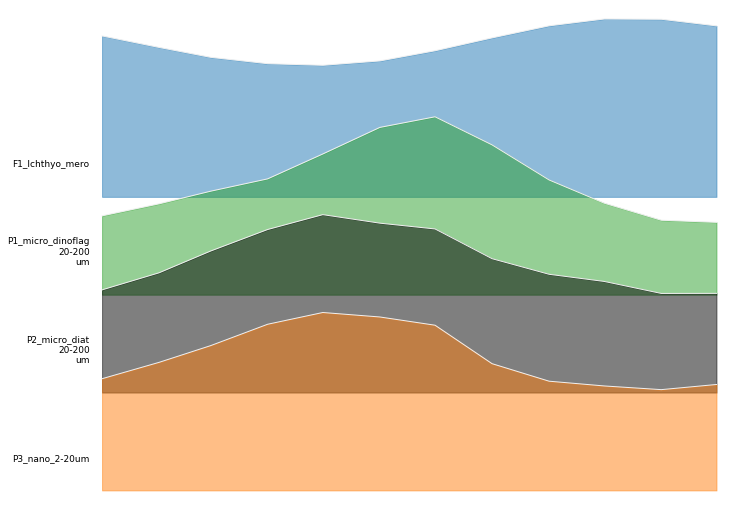

In [96]:
# ridgelines comparing ecological groups

ecospace_piv_df = ecospace_df.iloc[:,0:8].unstack().reset_index()

# do dates again
ecospace_piv_df["year"] = (ecospace_piv_df.TimeStep - 1) // 12 + 1979
ecospace_piv_df["month0"] = ecospace_piv_df.TimeStep % 12
ecospace_piv_df["month"] = ecospace_piv_df['month0'].apply(lambda x: 12if x == 0 else x)
ecospace_piv_df["day"] = 15 # assume Ecospace results are middle of month
ecospace_piv_df["date1"] = pd.to_datetime(ecospace_piv_df[["year", "month", "day"]])

ecospace_piv_df["eco_group"] = ecospace_piv_df["level_0"]
ecospace_piv_df["vals"] = ecospace_piv_df[0]

monthlyavg_df = ecospace_piv_df.groupby(['month','eco_group']).mean().reset_index()

unique_groups = monthlyavg_df["eco_group"].unique()
#unique_groups = unique_groups[0:2] #just diatoms and flag for now
unique_groups = unique_groups[0:4] #just phyto for now

# create palette with as different colors as possible
cmap = plt.get_cmap('tab10') # 10 colors max
# color count must match # unique groups
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1)]


# rows, cols
gs = (grid_spec.GridSpec(len(unique_groups),1))
fig = plt.figure(figsize=(12,9))
i = 0

#creating empty list
ax_objs = []

for eco_group in unique_groups:
    
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))
    
    # get only data for this eco group
    rows1 = np.equal(monthlyavg_df["eco_group"], eco_group)
    
    # trick plots - year arbitrary
    x = [datetime(2007, m, 15) for m in monthlyavg_df['month'][rows1]] 
    y = monthlyavg_df[0][rows1]
    
    ax_objs[-1].plot(x,y,color="#f0f0f0",lw=1)    
    ax_objs[-1].fill_between(x, y, alpha=0.5,color=palette[i]) # to do fix colors
    
    ax_objs[-1].set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)]) # match year above
    ax_objs[-1].xaxis.set_major_locator(dates.MonthLocator())
    ax_objs[-1].xaxis.set_major_formatter(dates.DateFormatter('%b'))
   
    ax.set_ylim([0, 12])
    
    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)
    
    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])
    ax_objs[-1].set_yticks([])
    
    if i == len(regime_bounds)-1:
        ax_objs[-1].set_xlabel("Month", fontsize=9,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])
        ax_objs[-1].set_xticks([])
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    # replaces set_ylabel
    adj_eco_group = eco_group.replace(" ","\n")
    ax_objs[-1].text(0.02,0.2,adj_eco_group,fontsize=9,ha="right",transform=ax_objs[-1].transAxes)
    #ax_objs[-1].text(0,0,name_regime,fontweight="bold",fontsize=9,ha="right",transform=ax_objs[-1].transAxes)
    #ax_objs[-1].set_ylabel(name_regime,rotation=0)
    
    i += 1

gs.update(hspace=-0.5) #adjust spacing between ridgelines
    
plt.tight_layout()
plt.show()
    
    

In [97]:
unique_groups

array(['F1_Ichthyo_mero', 'P1_micro_dinoflag 20-200 um',
       'P2_micro_diat 20-200 um', 'P3_nano_2-20um'], dtype=object)

In [50]:
# Read Chl_a data from Cit Sci 2015-2020
import pandas as pd

path_chla = "C://Users//Greig//Sync//6. SSMSP Model//Model Greig//Data//28. Phytoplankton//Depth Int Chlorophyl Cit Sci Pawlowicz 2015-2019//ORIGINAL//"
file_chla = "CitSci_dIchl_20220117.csv"

skipheaderlines = 3
chla_df = pd.read_csv(path_chla + file_chla, skiprows=skipheaderlines, parse_dates=True)

# skip units line
chla_df = chla_df[1:]

chla_df["datetime_pd"] = pd.to_datetime(chla_df["datetime"])
# https://www.dataindependent.com/pandas/pandas-to-datetime/

chla_df = chla_df[chla_df["chl"] != "     NaN"].reset_index()
chla_df["chl"] = pd.to_numeric(chla_df["chl"])
chla_df = chla_df[["chl", "datetime_pd","latitude","longitude"]]
chla_df["year_"] = chla_df.datetime_pd.dt.year
chla_df["month_"] = chla_df.datetime_pd.dt.month
chla_df["day_"] = chla_df.datetime_pd.dt.day

monthly_df = chla_df.groupby(['year_', 'month_']).agg({'chl': ['mean'],
                                                       'datetime_pd': ['count'],
                                                       'day_': ['mean']
                                                      }).reset_index()

monthly_df = monthly_df.reset_index()
# trouble getting datetime field figured out
monthly_df["day2"] = 15

# issue with monthly_df
citsci_yrmon_df = pd.DataFrame([], columns=["year","month","day","chl","count"])
citsci_yrmon_df["year"] = monthly_df["year_"]
citsci_yrmon_df["month"] = monthly_df["month_"]
citsci_yrmon_df["day"] = monthly_df["day_"]
citsci_yrmon_df["chl"] = monthly_df["chl"]
citsci_yrmon_df["count"] = monthly_df["datetime_pd"]

citsci_yrmon_df["date_"] = pd.to_datetime(citsci_yrmon_df[["year", "month", "day"]])
citsci_yrmon_df

,year,month,day,chl,count,date_
0,2015,1,7.583333,34.817975,72,2015-01-07
1,2015,2,10.910180,19.499663,167,2015-02-10
2,2015,3,19.160714,47.950064,224,2015-03-19
3,2015,4,15.815534,34.445737,103,2015-04-15
4,2015,5,18.339130,35.697059,345,2015-05-18
5,2015,6,16.662021,51.481090,287,2015-06-16
6,2015,7,14.897260,41.846938,146,2015-07-14
7,2015,8,13.493671,37.761309,79,2015-08-13
8,2015,9,10.879581,42.218589,191,2015-09-10
9,2015,10,5.026316,52.761779,76,2015-10-05


In [54]:
chla_df.sort_values(by=['datetime_pd'])[2960:3000]

,chl,datetime_pd,latitude,longitude,year_,month_,day_
2543,24.1734,2016-10-19 02:48:19,49.365872,-124.025571,2016,10,19
2544,28.6507,2016-10-19 03:22:37,49.425172,-123.991744,2016,10,19
2545,31.4055,2016-10-19 03:59:22,49.460860,-124.107996,2016,10,19
2546,30.4332,2016-10-19 05:08:27,49.483453,-124.417509,2016,10,19
2547,20.8045,2016-10-19 05:40:36,49.388737,-124.357508,2016,10,19
2548,19.1852,2016-10-19 06:39:48,49.333577,-124.176754,2016,10,19
2236,100.5693,2016-11-04 00:07:39,49.558124,-124.024902,2016,11,4
2468,580.2803,2016-11-05 14:13:00,49.333443,-124.174478,2016,11,5
2469,336.0524,2016-11-05 14:56:14,49.366689,-124.023619,2016,11,5
2470,255.5550,2016-11-05 15:42:03,49.425073,-123.992140,2016,11,5


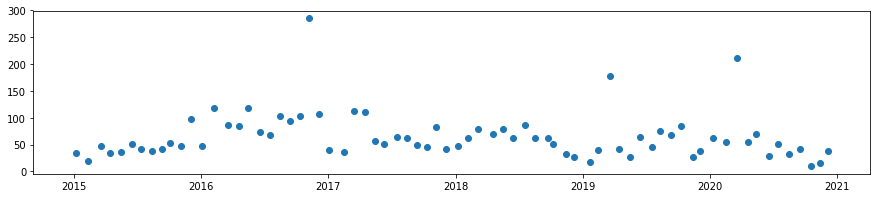

In [21]:
# merge the data together (easier to plot twice on same chart quickly)
#EwE_Allen1D_PerryZ_df = pd.merge(, EwE, how="outer", on=["year"])

# Build figure layout
fig, ax = plt.subplots(figsize=(15, 3))

plt.scatter(x=citsci_yrmon_df['date_'], y=citsci_yrmon_df['chl'])    # max Phyto B


In [73]:
# add / include similar data from IOS data
path_IOS_chl = "C://Users//Greig//Sync//6. SSMSP Model//Model Greig//Data//28. Phytoplankton//IOS Water Props 1979 - 1999//MODIFIED//"
f_chl_ios = "master_extract_waterproperties.csv"

#skipheaderlines = 3
chla_ios_df = pd.read_csv(path_IOS_chl + f_chl_ios, parse_dates=True)
#chla_df = pd.read_csv(path_IOS_chl + f_chl_ios, skiprows=skipheaderlines, parse_dates=True)


chla_ios_df_trim = chla_ios_df[["START TIME(UTC)","mission_basename","Sample_Number","Depth",
                               "Chlorophyll:Extracted","Production:Primary",
                               "Chlorophyll:Extracted:>5.0um","PAR","Chlorophyll:Extracted:>0.7um",
                               "Chlorophyll:Extracted_UNITS","PAR_UNITS","Chlorophyll:Extracted:>5.0um_UNITS",
                               "Chlorophyll:Extracted:>0.7um_UNITS","LAT","LON"]]
chla_ios_df_trim["date1"] = pd.to_datetime(chla_ios_df_trim["START TIME(UTC)"])
chla_ios_df_trim = chla_ios_df_trim.replace(-99, np.nan)
chla_ios_df_trim.dtypes

C:\Users\Greig\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


START TIME(UTC)                               object
mission_basename                              object
Sample_Number                                float64
Depth                                        float64
Chlorophyll:Extracted                        float64
Production:Primary                           float64
Chlorophyll:Extracted:>5.0um                 float64
PAR                                          float64
Chlorophyll:Extracted:>0.7um                 float64
Chlorophyll:Extracted_UNITS                   object
PAR_UNITS                                     object
Chlorophyll:Extracted:>5.0um_UNITS            object
Chlorophyll:Extracted:>0.7um_UNITS            object
LAT                                          float64
LON                                          float64
date1                                 datetime64[ns]
dtype: object

In [74]:
chla_ios_df_trim

,START TIME(UTC),mission_basename,Sample_Number,Depth,Chlorophyll:Extracted,Production:Primary,Chlorophyll:Extracted:>5.0um,PAR,Chlorophyll:Extracted:>0.7um,Chlorophyll:Extracted_UNITS,PAR_UNITS,Chlorophyll:Extracted:>5.0um_UNITS,Chlorophyll:Extracted:>0.7um_UNITS,LAT,LON,date1
0,1979-05-23 02:25:00,1979-030-0001,10.0,0.8,21.41,78.83,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700,1979-05-23 02:25:00
1,1979-05-23 02:25:00,1979-030-0001,9.0,8.7,19.44,90.54,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700,1979-05-23 02:25:00
2,1979-05-23 02:25:00,1979-030-0001,8.0,19.2,20.35,NaN,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700,1979-05-23 02:25:00
3,1979-05-23 02:25:00,1979-030-0001,7.0,27.3,7.39,NaN,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700,1979-05-23 02:25:00
4,1979-05-23 02:25:00,1979-030-0001,6.0,51.0,0.71,NaN,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700,1979-05-23 02:25:00
5,1979-05-23 02:25:00,1979-030-0001,5.0,73.1,0.24,NaN,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700,1979-05-23 02:25:00
6,1979-05-23 02:25:00,1979-030-0001,4.0,99.2,NaN,NaN,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700,1979-05-23 02:25:00
7,1979-05-23 02:25:00,1979-030-0001,3.0,126.6,NaN,NaN,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700,1979-05-23 02:25:00
8,1979-05-23 02:25:00,1979-030-0001,2.0,151.4,0.15,NaN,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700,1979-05-23 02:25:00
9,1979-05-23 02:25:00,1979-030-0001,1.0,174.1,0.11,NaN,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700,1979-05-23 02:25:00


,mission_basename,Sample_Number,Depth,Chlorophyll:Extracted,Production:Primary,Chlorophyll:Extracted:>5.0um,PAR,Chlorophyll:Extracted:>0.7um,Chlorophyll:Extracted_UNITS,PAR_UNITS,Chlorophyll:Extracted:>5.0um_UNITS,Chlorophyll:Extracted:>0.7um_UNITS,LAT,LON
0,1979-030-0001,10.0,0.8,21.41,78.83,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700
1,1979-030-0001,9.0,8.7,19.44,90.54,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700
2,1979-030-0001,8.0,19.2,20.35,-99.00,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700
3,1979-030-0001,7.0,27.3,7.39,-99.00,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700
4,1979-030-0001,6.0,51.0,0.71,-99.00,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700
5,1979-030-0001,5.0,73.1,0.24,-99.00,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700
6,1979-030-0001,4.0,99.2,-99.00,-99.00,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700
7,1979-030-0001,3.0,126.6,-99.00,-99.00,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700
8,1979-030-0001,2.0,151.4,0.15,-99.00,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700
9,1979-030-0001,1.0,174.1,0.11,-99.00,NaN,NaN,NaN,mg/m^3,NaN,NaN,NaN,48.52000,-124.71700


In [62]:
chla_ios_df

,mission_basename,Sample_Number,Depth,Nitrate_plus_Nitrite,Silicate,Phosphate,Chlorophyll:Extracted,Production:Primary,Oxygen:Dissolved,Temperature,...,START TIME(UTC),END TIME(UTC),DURATION (DAYS),STATION,LAT,LON,DATATYPE,FILENAME,FILE_URL,NETCDF_URL
0,1979-030-0001,10.0,0.8,-99.0,-99.0,0.40,21.41,78.83,10.99,11.10,...,1979-05-23 02:25:00,1979-05-23 02:25:00,0,2,48.52000,-124.71700,Bottle:Rosette:Up:NoStop + CTD,Cruise_Data/1979/1979-030/BOTTLE/1979-030-0001...,www.waterproperties.ca/osd_data_archive/Cruise...,www.waterproperties.ca/osd_data_archive/netCDF...
1,1979-030-0001,9.0,8.7,-99.0,-99.0,0.41,19.44,90.54,10.59,10.80,...,1979-05-23 02:25:00,1979-05-23 02:25:00,0,2,48.52000,-124.71700,Bottle:Rosette:Up:NoStop + CTD,Cruise_Data/1979/1979-030/BOTTLE/1979-030-0001...,www.waterproperties.ca/osd_data_archive/Cruise...,www.waterproperties.ca/osd_data_archive/netCDF...
2,1979-030-0001,8.0,19.2,10.6,21.2,1.18,20.35,-99.00,7.49,9.19,...,1979-05-23 02:25:00,1979-05-23 02:25:00,0,2,48.52000,-124.71700,Bottle:Rosette:Up:NoStop + CTD,Cruise_Data/1979/1979-030/BOTTLE/1979-030-0001...,www.waterproperties.ca/osd_data_archive/Cruise...,www.waterproperties.ca/osd_data_archive/netCDF...
3,1979-030-0001,7.0,27.3,18.5,30.0,1.81,7.39,-99.00,5.88,9.02,...,1979-05-23 02:25:00,1979-05-23 02:25:00,0,2,48.52000,-124.71700,Bottle:Rosette:Up:NoStop + CTD,Cruise_Data/1979/1979-030/BOTTLE/1979-030-0001...,www.waterproperties.ca/osd_data_archive/Cruise...,www.waterproperties.ca/osd_data_archive/netCDF...
4,1979-030-0001,6.0,51.0,24.0,37.2,2.12,0.71,-99.00,4.38,8.26,...,1979-05-23 02:25:00,1979-05-23 02:25:00,0,2,48.52000,-124.71700,Bottle:Rosette:Up:NoStop + CTD,Cruise_Data/1979/1979-030/BOTTLE/1979-030-0001...,www.waterproperties.ca/osd_data_archive/Cruise...,www.waterproperties.ca/osd_data_archive/netCDF...
5,1979-030-0001,5.0,73.1,27.8,39.3,2.30,0.24,-99.00,3.20,7.82,...,1979-05-23 02:25:00,1979-05-23 02:25:00,0,2,48.52000,-124.71700,Bottle:Rosette:Up:NoStop + CTD,Cruise_Data/1979/1979-030/BOTTLE/1979-030-0001...,www.waterproperties.ca/osd_data_archive/Cruise...,www.waterproperties.ca/osd_data_archive/netCDF...
6,1979-030-0001,4.0,99.2,-99.0,-99.0,-99.00,-99.00,-99.00,-99.00,7.34,...,1979-05-23 02:25:00,1979-05-23 02:25:00,0,2,48.52000,-124.71700,Bottle:Rosette:Up:NoStop + CTD,Cruise_Data/1979/1979-030/BOTTLE/1979-030-0001...,www.waterproperties.ca/osd_data_archive/Cruise...,www.waterproperties.ca/osd_data_archive/netCDF...
7,1979-030-0001,3.0,126.6,32.9,50.6,2.61,-99.00,-99.00,2.22,6.95,...,1979-05-23 02:25:00,1979-05-23 02:25:00,0,2,48.52000,-124.71700,Bottle:Rosette:Up:NoStop + CTD,Cruise_Data/1979/1979-030/BOTTLE/1979-030-0001...,www.waterproperties.ca/osd_data_archive/Cruise...,www.waterproperties.ca/osd_data_archive/netCDF...
8,1979-030-0001,2.0,151.4,32.9,51.7,2.61,0.15,-99.00,2.22,6.92,...,1979-05-23 02:25:00,1979-05-23 02:25:00,0,2,48.52000,-124.71700,Bottle:Rosette:Up:NoStop + CTD,Cruise_Data/1979/1979-030/BOTTLE/1979-030-0001...,www.waterproperties.ca/osd_data_archive/Cruise...,www.waterproperties.ca/osd_data_archive/netCDF...
9,1979-030-0001,1.0,174.1,33.6,52.8,2.72,0.11,-99.00,2.18,6.75,...,1979-05-23 02:25:00,1979-05-23 02:25:00,0,2,48.52000,-124.71700,Bottle:Rosette:Up:NoStop + CTD,Cruise_Data/1979/1979-030/BOTTLE/1979-030-0001...,www.waterproperties.ca/osd_data_archive/Cruise...,www.waterproperties.ca/osd_data_archive/netCDF...


In [ ]:
# Read Ecospace out ASCII maps